In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [2]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

all_data = pd.read_csv(data_path + 'all_data_5_22_17_10_42.csv' , index_col= 'PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [6]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [7]:
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned
PassengerId,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9


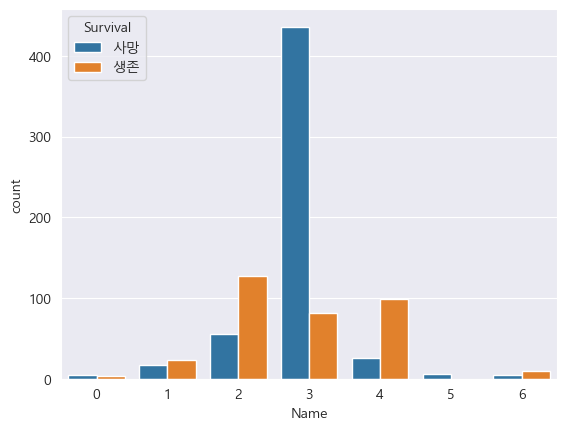

In [8]:
ax = sns.countplot(x='Name',  hue = 'Survival' , data = all_data)
plt.show()

## Cabin 전처리 해보기

In [9]:
all_data['Cabin'].value_counts()

8    1014
2      94
1      65
3      46
4      41
0      22
5      21
6       5
7       1
Name: Cabin, dtype: int64

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1309 non-null   int64  
 1   Sex          1309 non-null   int64  
 2   Embarked     1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Age_binned   1309 non-null   object 
 5   Pclass       1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Survival     891 non-null    object 
 9   Cabin        1309 non-null   int64  
 10  Fare         1309 non-null   float64
 11  Fare_binned  1309 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 132.9+ KB


In [11]:
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned
PassengerId,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x612 sparse matrix of type '<class 'numpy.float64'>'
	with 15708 stored elements in Compressed Sparse Row format>

In [13]:
features2 = all_data.columns.tolist()

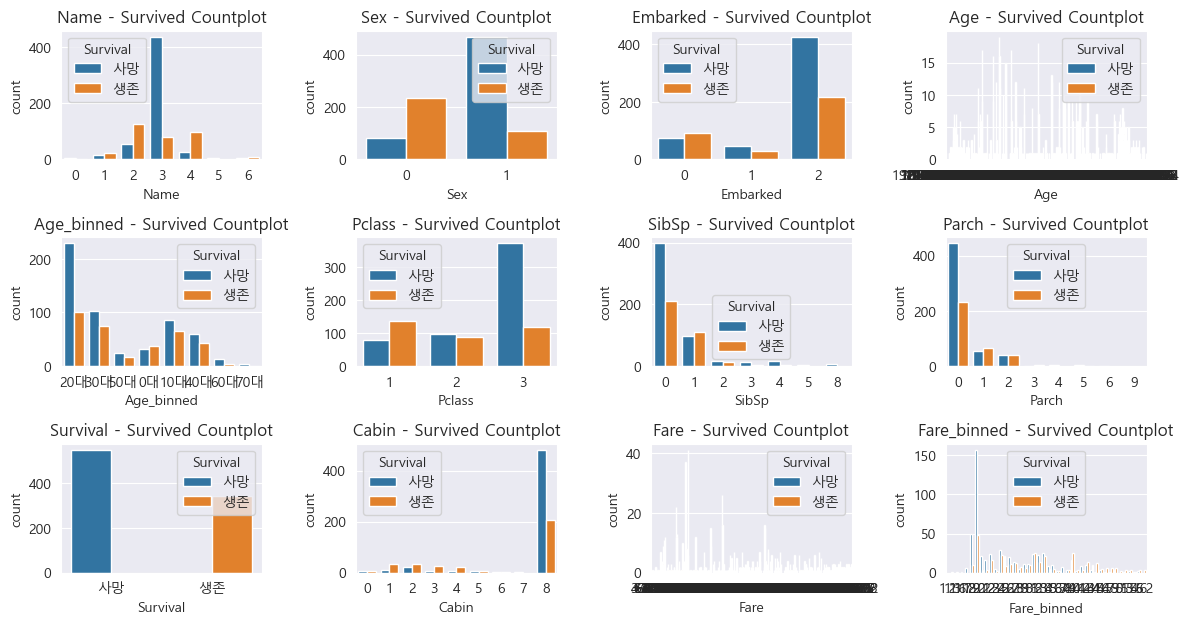

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯을 생성할 크기 설정
plt.figure(figsize=(12, 8))

# 피처들의 리스트
features = features2

# 피처들에 대한 countplot 그리기
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='Survival', data=all_data)
    plt.title(f'{feature} - Survived Countplot')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


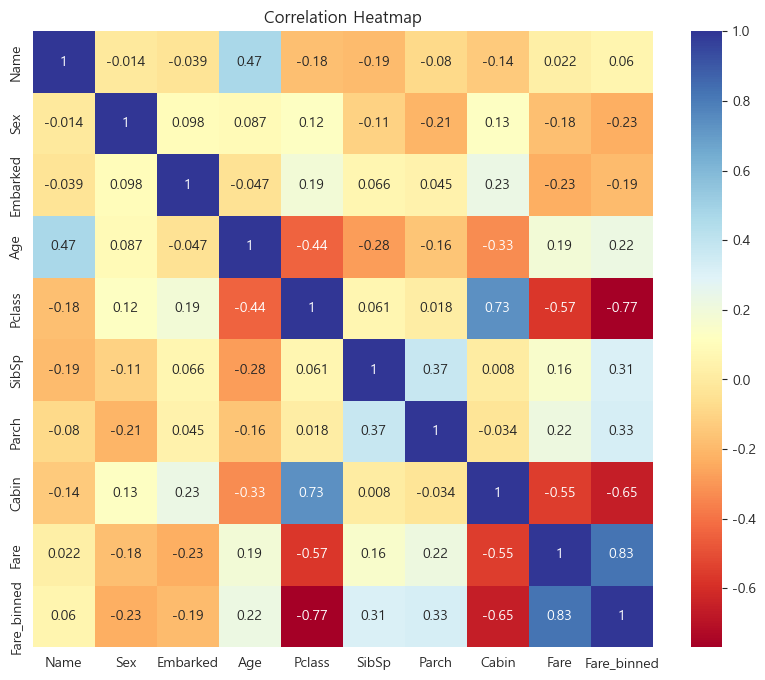

In [15]:
import seaborn as sns

# 피처들의 리스트
features = features

# 각 피처별 'Survived'와의 상관계수 계산
correlations = all_data[features + ['Survival']].corr()
# filtered_correlations = correlations[correlations['Survival'].abs() >= 0.2]

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='RdYlBu')
plt.title("Correlation Heatmap")

# 그래프 출력
plt.show()


In [16]:
object_col = ['Name' , 'Sex' , 'Embarked'  , 'SibSp', 'Parch' , 'Cabin']
binary_col = ['Fare' , 'Pclass', 'Age']

idx_col = ['Age_binned' , 'Fare_binned']

## 타깃값 분포

In [17]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬


## 연속형 피처 분포

In [18]:
all_data_bin = all_data[binary_col]

all_data_bin

,Fare,Pclass,Age
PassengerId,,,
1,7.2500,3,22.000000
2,71.2833,1,38.000000
3,7.9250,3,26.000000
4,53.1000,1,35.000000
5,8.0500,3,35.000000
...,...,...,...
1305,8.0500,3,28.516607
1306,108.9000,1,39.000000
1307,7.2500,3,38.500000


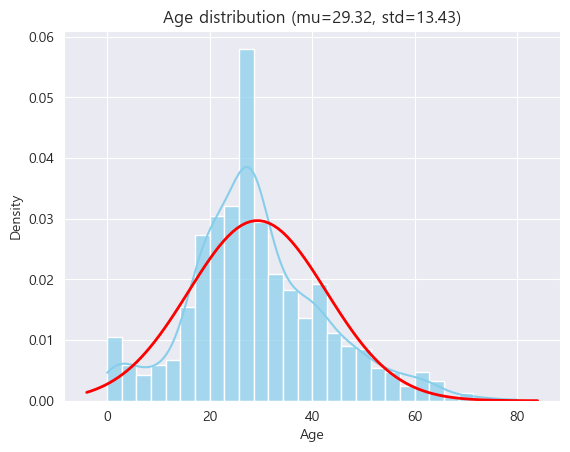

In [19]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

# 히스토그램과 정규분포 곡선 그리기
sns.histplot(all_data['Age'], kde=True, stat='density', color='skyblue', alpha=0.7)
mu, std = norm.fit(all_data['Age'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f'Age distribution (mu={mu:.2f}, std={std:.2f})')
plt.show()

## 모델링_with 피처엔지니어링

- 명목형 피처는 OneHotEncoding ==> Name , Sex , Embarked

- Pclass 는 MinMaxScaler로

In [20]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # 원-핫 인코더 생성
nom_feature = ['Name','Age_binned','Sex' , 'Embarked', 'Cabin']
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_feature])
print(type(encoded_nom_matrix))
encoded_nom_matrix

<class 'scipy.sparse._csr.csr_matrix'>


<1309x29 sparse matrix of type '<class 'numpy.float64'>'
	with 6545 stored elements in Compressed Sparse Row format>

In [21]:
# 범주형 변수의 원래 이름을 추출합니다.
#
nom_feature_names = []
for feature in nom_feature:
    categories = onehot_encoder.categories_[nom_feature.index(feature)]
    for category in categories:
        nom_feature_names.append(f"{feature}_{category}")



# 결과를 출력합니다.
print(nom_feature_names)


['Name_0', 'Name_1', 'Name_2', 'Name_3', 'Name_4', 'Name_5', 'Name_6', 'Age_binned_0대', 'Age_binned_10대', 'Age_binned_20대', 'Age_binned_30대', 'Age_binned_40대', 'Age_binned_50대', 'Age_binned_60대', 'Age_binned_70대', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Cabin_0', 'Cabin_1', 'Cabin_2', 'Cabin_3', 'Cabin_4', 'Cabin_5', 'Cabin_6', 'Cabin_7', 'Cabin_8']


In [22]:
print(type(encoded_nom_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


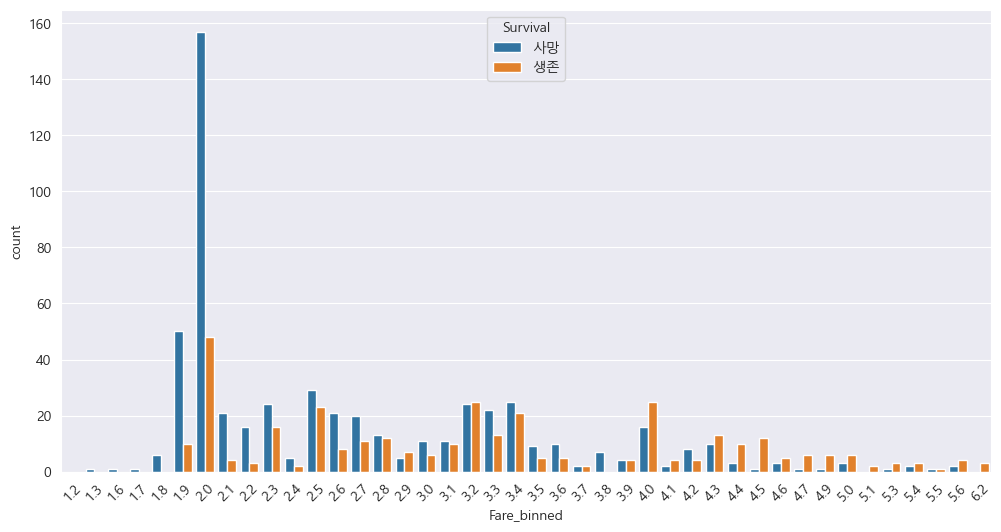

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
ax = sns.countplot(x='Fare_binned', hue='Survival', data=all_data)

# x 축 값이 잘 보이도록 설정
ax.tick_params(axis='x', labelrotation=45)

# 그래프 출력
plt.show()

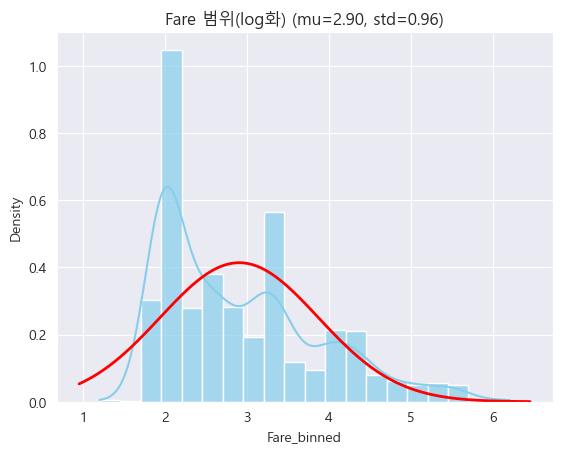

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 히스토그램 그리기
sns.histplot(all_data['Fare_binned'].dropna(), kde=True, stat='density', color='skyblue', alpha=0.7)

# 정규분포 계산
mu, std = norm.fit(all_data['Fare_binned'].dropna())

# x 값 범위 설정
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규분포 그래프 그리기
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# 그래프 제목 설정
plt.title(f'Fare 범위(log화) (mu={mu:.2f}, std={std:.2f})')

# 그래프 출력
plt.show()


# 인코딩 및 스케일링 된 피처 합치기

In [25]:
nom_feature_names

['Name_0',
 'Name_1',
 'Name_2',
 'Name_3',
 'Name_4',
 'Name_5',
 'Name_6',
 'Age_binned_0대',
 'Age_binned_10대',
 'Age_binned_20대',
 'Age_binned_30대',
 'Age_binned_40대',
 'Age_binned_50대',
 'Age_binned_60대',
 'Age_binned_70대',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Cabin_0',
 'Cabin_1',
 'Cabin_2',
 'Cabin_3',
 'Cabin_4',
 'Cabin_5',
 'Cabin_6',
 'Cabin_7',
 'Cabin_8']

In [26]:
all_data2 = all_data[binary_col]
all_data2

,Fare,Pclass,Age
PassengerId,,,
1,7.2500,3,22.000000
2,71.2833,1,38.000000
3,7.9250,3,26.000000
4,53.1000,1,35.000000
5,8.0500,3,35.000000
...,...,...,...
1305,8.0500,3,28.516607
1306,108.9000,1,39.000000
1307,7.2500,3,38.500000


In [27]:
encoded_nom_matrix

<1309x29 sparse matrix of type '<class 'numpy.float64'>'
	with 6545 stored elements in Compressed Sparse Row format>

In [28]:
# encoded_stan

In [29]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data2),
                               encoded_nom_matrix],
                              format='csr')

all_data_sprs

<1309x32 sparse matrix of type '<class 'numpy.float64'>'
	with 10471 stored elements in Compressed Sparse Row format>

In [30]:
CSR_NAMES = all_data2.columns.tolist() + nom_feature_names
CSR_NAMES

['Fare',
 'Pclass',
 'Age',
 'Name_0',
 'Name_1',
 'Name_2',
 'Name_3',
 'Name_4',
 'Name_5',
 'Name_6',
 'Age_binned_0대',
 'Age_binned_10대',
 'Age_binned_20대',
 'Age_binned_30대',
 'Age_binned_40대',
 'Age_binned_50대',
 'Age_binned_60대',
 'Age_binned_70대',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Cabin_0',
 'Cabin_1',
 'Cabin_2',
 'Cabin_3',
 'Cabin_4',
 'Cabin_5',
 'Cabin_6',
 'Cabin_7',
 'Cabin_8']

In [31]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values

In [32]:
print(X_train.toarray())

[[ 7.25   3.    22.    ...  0.     0.     1.   ]
 [71.283  1.    38.    ...  0.     0.     0.   ]
 [ 7.925  3.    26.    ...  0.     0.     1.   ]
 ...
 [23.45   3.    15.926 ...  0.     0.     1.   ]
 [30.     1.    26.    ...  0.     0.     0.   ]
 [ 7.75   3.    32.    ...  0.     0.     1.   ]]


In [33]:
X_train

<891x32 sparse matrix of type '<class 'numpy.float64'>'
	with 7127 stored elements in Compressed Sparse Row format>

In [34]:
#랜덤포레스트

## 하이퍼파라미터 최적화

In [35]:
import numpy as np


def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]  # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples)  # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()]  # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)  # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred)  # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()]  # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order)  # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)  # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true


# LightGBM 용 gini() 함수

def gini(preds, dtrain):
    labels = dtrain.get_label()

    return 'gini', eval_gini(labels, preds), True


In [36]:
# OOF 방식으로 LightGBM 훈련
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# 층화 K 폴드 교차 검증기는 타깃값이 불균형하므로 K폴드가 아닌 층화 K폴드를 수행하는 게 바람직하다. 층화 K폴드는 타깃값이 균등하게
# 폴드를 나누는 방식이기 때문이다.


# n_splits 파라미터로 전달한 수만큼 폴드를 나눈다. 여기서는 5개로 나누었다. shuffle = True 를 전달하면 폴드를 나눌때 데이터를 섞어준다.
# LightGBM의 하이퍼파라미터를 설정한다. LightGBM은 하이퍼파라미터를 갖고 있지만, 여기서는 4가지만 설정한다.

params = {'objective': 'binary', 'learning_rate': 0.01, 'force_row_wise': True, 'random_state': 0}

# 이진분류 문제이므로 objective 파라미터는 binary로 설정했다. 학습률은 0.01로, 랜덤 스테이트 값은 9으로 설정했다.
# force_row_wise : True 는 경고 문구를 없애려고 추가한 파라미터이다.
# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X_train.shape[0])

# ==> oof_val_preds 는 검증 데이터를 활용해 예측한 확률값을 저장하는 배열이다. K 폴드로 나누어도 훈련 데이터 전체가 결국엔 한 번씩 검증 데이터로 활용된다. 따라서 oof_val_preds 배열 크기는 훈련 데이터와 같아야 한다.
# 훈련 데이터 개수는 X.shpae[0]으로 구한다.

# OOF 방식으로 훈련된 모델로 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# oof_test_preds는 테스트 데이터를 활용해 예측한 확률값을 저장하는 배열이다. 최종 제출에 사용할 값이므로 크기는 테스트 데이터와 같아야한다. 테스트 데이터 개수는 X_test.shape[0]으로 구한다.


In [37]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X_train, y)):
    print('#' * 40, f'폴드 {idx + 1} / 폴드 {folds.n_splits}', '#' * 40)

    X_train2, y_train = X_train[train_idx], y[train_idx]  # 훈련용 데이터
    X_valid, y_valid = X_train[valid_idx], y[valid_idx]  # 검증용 데이터

    dtrain = lgb.Dataset(X_train2, y_train)  # LightGBM 전용 훈련 데이터 셋
    dvalid = lgb.Dataset(X_valid, y_valid)  # LightGBM 전용 검증 데이터 셋

    lgb_model = lgb.train(params=params,  # 훈련용 하이퍼파라미터
                          train_set=dtrain,  # 훈련 데이터 셋
                          num_boost_round=1000,  # 부스팅 반복 횟수
                          valid_sets=dvalid,  # 성능 평가용 검증 데이터 셋
                          early_stopping_rounds=100,  # 조기종료 조건
                          verbose_eval=100)  # 100번째마다 점수 출력

    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 이진 분류에 맞게 변환
    oof_val_preds[valid_idx] += (lgb_model.predict(X_valid) >= 0.5).astype(int)

    # 적절한 평가지표 선택
    accuracy = accuracy_score(y_valid, oof_val_preds[valid_idx])
    precision = precision_score(y_valid, oof_val_preds[valid_idx])
    recall = recall_score(y_valid, oof_val_preds[valid_idx])
    f1 = f1_score(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx + 1} 정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}, F1 점수: {f1}\n')


######################################## 폴드 1 / 폴드 5 ########################################
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_logloss: 0.384722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\park sung hyuk95\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[163]	valid_0's binary_logloss: 0.467231
폴드 5 정확도: 0.8033707865168539, 정밀도: 0.7741935483870968, 재현율: 0.6956521739130435, F1 점수: 0.732824427480916



In [38]:
print('OOF 검증 데이터 지니계수 :' , eval_gini(y,  oof_val_preds))

OOF 검증 데이터 지니계수 : 0.5947656025309176


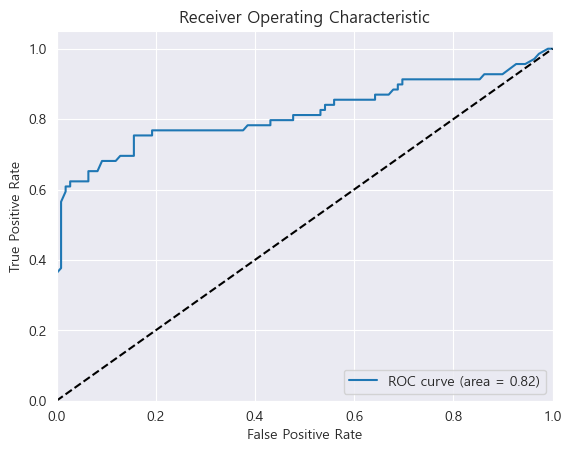

최적의 임계값: 0.4358844813958237


In [39]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = lgb_model.predict(X_valid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [40]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

이진 분류 예측 결과: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [41]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ",date_list)



현재 날짜 및 시각 :  [5, 23, 9, 43, 20]


In [42]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_lightGBM_basic_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 모델 하이퍼파라미터 최적화

In [43]:
all_data_sprs

<1309x32 sparse matrix of type '<class 'numpy.float64'>'
	with 10471 stored elements in Compressed Sparse Row format>

In [44]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y= train['Survived'].values

In [45]:
from sklearn.model_selection import train_test_split

X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)


# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [46]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위

# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves' : (30 , 40) , # 개별 트리가 가질 수 있는 최대 말단 노드 개수 , 트리 복잡도 결정, 값이 클수록 좋다.
                'lambda_l1' : (0.7 , 0.9), # L1 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'lambda_l2' : (0.9 , 1), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'feature_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
                'bagging_fraction' : (0.6 , 0.9), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                'min_child_samples' : (6 , 10) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수 , 값이 클수록 과대적합 방지
                'min_child_weight' : (10 , 40)} # 과대적합 방지 위한 값


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'binary' , # 훈련 목적 , 회귀에서는 'regression' , 이진분류에서는 'binary' , 다중분류에서는 'multiclass' 사용
                'learning_rate' : 0.005, # 학습률( 부스팅 이터레이션을 반복하면서 모델을 업데이트하는 데 사용 되는 비율)
                'bagging_freq' : 1, # 배깅 수행 빈도, 몇번의 이터레이션마다 배깅 수행할 지 결정
                'force_row_wise' : True, # 메모리 용량이 충분하지 않을 때 메모리 효율을 높이는 파라미터
                'random_state' : 1991} # 랜덤 시드값 (코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [47]:
def eval_function(num_leaves , lambda_l1 , lambda_l2 , feature_fraction , bagging_fraction , min_child_samples , min_child_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'num_leaves' : int(round(num_leaves)) , # 개발 트리가 가질 수 있는 최대 말단 노드 개수, 트리 복잡도 결정 , 값이 클수록 좋다.
              'lambda_l1' : lambda_l1, # L1 규제 조정값 , 값이 클 수록 과대적합 방지 효과
              'lambda_l2' : lambda_l2 , # L2 규제 조정값 , 값이 클 수록 과대적합 방지 효과
              'feature_fraction' : feature_fraction ,  # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
              'bagging_fraction' : bagging_fraction, # 개별 트리를 훈련할 때 사용할 배깅 데이터 샘플링 비율
              'min_child_samples' : int(round(min_child_samples)) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수, 값이 클수록 과대적합 방지
              'min_child_weight' : min_child_weight, # 과대적합 방지 위한 값
              'feature_pre_filter' : False} #

    #하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
                          train_set = bayes_dtrain, # 훈련 데이터셋
                          num_boost_round= 2500, #부스팅 반복횟수
                          valid_sets= bayes_dvalid, # 성능 평가용 검증 데이터 셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval= False) # 계속 점수 출력
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

In [62]:
# ! pip install bayesian-optimization


In [ ]:
!pip uninstall colorama
!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org colorama


In [65]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f = eval_function, # 평가지표 계산 함수
                                 pbounds = param_bounds, # 하이퍼파라미터 범위
                                 random_state = 0 )

ImportError: cannot import name 'just_fix_windows_console' from 'colorama' (C:\Users\park sung hyuk95\anaconda3\lib\site-packages\colorama\__init__.py)

In [ ]:
# 베이지안 최적화 수행

optimizer.maximize(init_points=  3 , n_iter = 6) # init_points 는 무작위로 하이퍼파라미터를 탐색하는 횟수, n_iter는 베이지안 최적화 반복 횟수

In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params


In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
# 값이 고정된 하이퍼파라미터 추가

max_params.update(fixed_params)
# 최종 하이퍼파라미터 출력
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5 , shuffle = True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열

oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련 ,검증 , 예측

for idx, (train , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)

    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = max_params , # 최적 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round= 2500, # 부스팅 반복 횟수
                          valid_sets= dvalid , # 성능 평가용 검증 데이터셋
                          feval = gini, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval = 100) # 100 번째 마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    oof_test_preds_lgb = oof_test_preds
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 :' , eval_gini(y,  oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = lgb_model.predict(X_valid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds_lgb >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_bayes_lightGBM_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## XGBoost 모델

In [ ]:
# XGBoost용 gini() 함수

def gini(preds , dtrain):
    labels = dtrain.get_label()
    return 'gini' , eval_gini(labels,preds)

### 데이터 셋 준비


In [ ]:
import xgboost as xgb

from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터 , 검증 데이터 분리( 베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

### 하이퍼파라미터 범위 설정

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 8) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.6 , 0.9), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.7 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 7), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6)} # 뷸균형 데이터 가중치 조정 값 ,
# 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
# 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'binary:logistic' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용
                'learning_rate' : 0.02, # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)
                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [ ]:
def eval_function(max_depth , subsample , colsample_bytree , min_child_weight , reg_alpha , gamma , reg_lambda , scale_pos_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'max_depth' : int(round(max_depth)) , # 개별 트리의 최대깊이
              'subsample' : subsample, # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
              'colsample_bytree' : colsample_bytree , # 개별 트리를 훈련할때 사용하는 피처 샘플링
              'min_child_weight' :  # 과대적합 방지위한 값
                  min_child_weight,
              'gamma' : gamma, # 말단 노드가 분할하기 위한 최소 손실 감소 값
              'reg_alpha' : reg_alpha, # L1 규제 조정값
              'reg_lambda' : reg_lambda, # L2 규제 조정값
              'scale_pos_weight' : scale_pos_weight} # 불균형 데이터 가중치 조정값

    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # XGBoost 모델 훈련 , train() 메서드의 하이퍼파라미터
    xgb_model = xgb.train(params = params , # XGBoost 모델의 하이퍼파라미터 목록 , 딕셔너리 타입으로 전달
                          dtrain = bayes_dtrain, # 훈련 데이터셋, xgboost.DMatrix 타입으로 전달
                          num_boost_round= 2000, # 부스팅 반복 횟수, 정수형 타입으로 전달
                          # num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합의 우려가 있다.
                          # num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련 시간이 짧아진다.
                          # 일반적으로 num_boost_round를 늘리면 learning_rate를 줄여야 한다.

                          evals = [(bayes_dvalid , ' bayes_dvalid')],
                          # 모델 성능 평가용 검증 데이터셋
                          # (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열로 정하면 된다.
                          maximize = True, # feval 평가지수가 높으면 좋은지 여부
                          feval = gini, # 검증용 평가지표, 사용자 정의 함수 형태
                          # evals를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가지표 함수
                          # 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수이다.
                          early_stopping_rounds= 200,
                          # 조기종료 조건
                          # 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속으로
                          # 좋아지지 않는다면 훈련을 중단하는데, 훈련 중단에 필요한 최소횟수가 early_stopping_rounds 이다. 즉 , early_stopping_rounds
                          # 동안 모델 성능이 좋아지지 않는다면 훈련을 중단한다.

                          # 과대적합 방지 효과

                          # 조기종료를 적용하기 위해서는 evals 에 검증 데이터가 하나 이상 있어야한다. 또한 evals에 검증 데이터가 여러 개라면 마지막 검증
                          # 데이터를 기준으로 조기종료 조건을 적용한다.


                          verbose_eval= False) # 성능 점수 로그 설정 값
    # True 로 설정하면 매 부스팅 스텝마다 평가점수르 출력
    # 출력값이 너무 많아지는 것을 방지하기위해 verbose_eval로 설정

    best_iter = xgb_model.best_iteration # 최적 반복횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid , iteration_range=(0, best_iter))

    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

## 최적화 수행

In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

In [ ]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['max_depth'] = int(round(max_params['max_depth']))

# 값이 고정된 하이퍼파라미터 추가

max_params.update(fixed_params)
max_params

## 모델 훈련 및 성능 검증


In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = gini,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 : ' , eval_gini(y , oof_val_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
valid_probabilities = xgb_model.predict(dvalid)

# Case 1: valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = valid_probabilities

# Case 2: valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = (oof_test_preds_xgb >= threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds

In [ ]:
oof_test_preds_xgb

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_xgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 과 XGBoost 앙상블

In [ ]:
oof_test_preds = oof_test_preds_lgb *0.5 + oof_test_preds_xgb *0.5

oof_test_preds

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# 검증 데이터에 대한 예측 확률을 얻습니다.
lgb_valid_probabilities = lgb_model.predict(X_valid)
xgb_valid_probabilities = xgb_model.predict(dvalid)

# 앙상블된 예측 확률 계산
ensemble_valid_probabilities = (lgb_valid_probabilities + xgb_valid_probabilities) / 2

# Case 1: ensemble_valid_probabilities가 1차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
positive_probabilities = ensemble_valid_probabilities

# Case 2: ensemble_valid_probabilities가 2차원 배열인 경우
# 양성 클래스에 대한 예측 확률을 추출합니다.
# positive_probabilities = ensemble_valid_probabilities[:, 1]

# ROC 곡선을 생성합니다.
fpr, tpr, thresholds = roc_curve(y_valid, positive_probabilities)

# ROC 곡선 아래 면적(Area Under Curve, AUC)을 계산합니다.
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 직선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 선택
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print("최적의 임계값:", optimal_threshold)


In [ ]:
threshold = optimal_threshold  # 임계값 설정

# 이진 분류로 변환
binary_preds = ( oof_test_preds >= optimal_threshold).astype(int)

# 이진 분류 결과 출력
print("이진 분류 예측 결과:", binary_preds)
y_preds = binary_preds
y_preds
# y_preds = oof_test_preds




In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 앙상블

In [ ]:
X_train

In [ ]:
# from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
#
# # 개별 모델 생성
# rf_model = RandomForestClassifier()
# xgb_model = xgb.XGBClassifier()
# lgb_model = lgb.LGBMClassifier()
#
# # 앙상블 모델 생성
# ensemble_model = VotingClassifier(
#     estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
#     voting='soft'  # 소프트 보팅 방식 사용 (확률 기반)
# )
#
# # 그리드 서치를 위한 하이퍼파라미터 그리드 준비
# param_grid = {
#     'rf__n_estimators': [100, 200, 300],
#     'rf__max_depth': [None, 5, 10],
#     'xgb__n_estimators': [100, 200, 300],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__learning_rate': [0.1, 0.01, 0.001],
#     'lgb__n_estimators': [100, 200, 300],
#     'lgb__max_depth': [3, 5, 7],
#     'lgb__learning_rate': [0.1, 0.01, 0.001]
# }
#
# # 그리드 서치 객체 생성
# grid_search = GridSearchCV(ensemble_model, param_grid, cv=5)
#
# # 그리드 서치 수행
# grid_search.fit(X_train, y_train)
#
# # 최적의 모델 및 파라미터 출력
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# print("Best Model:", best_model)
# print("Best Parameters:", best_params)


In [ ]:
# # 최적의 모델로 예측 수행
# y_pred = best_model.predict(X_test)
#
# # 예측 결과 출력
# y_pred

In [ ]:
# import datetime
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute, now.second]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['Survived'] = y_pred
# submission.to_csv(f'submission_GridSearch_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')